# MEU205 - examen du 16 décembre 2021

---

* Durée de l'épreuve 1h30.
* Le sujet est compososé de deux exercices **indépendants**.
* Tous les documents ainsi que les calculatrices et les **téléphones portables** sont interdits.
* La communication entre les étudiants est interdite.
* Toutes vos fonctions doivent être commentées selon la norme de `python`.
---

# Exercice 2 : une classe pour la résolution des équations différentielles ordinaires

---

*Le but de cet exercice est d'introduire, de tester et de valider expérimentalement, une façon simple de résoudre de façon approchée l'équation d'inconnue $y : t\mapsto y(t)$ :*
$$
 \left\lbrace
    \begin{aligned}
        &y^{\prime}(t)=f(t,y), && t\geq t_0,  \\
        &y(t_{0})=y_{0}.
    \end{aligned}
\right.
\qquad\qquad\qquad (1)
$$
*avec f une fonction $\mathcal{C}^1$. On admet que le cadre mathématique est « bon » : en particulier, la solution existe et elle est unique ; cela est vrai pour tout couple $(t_{0}, y_{0})$.  On notera $y : t \rightarrow y(t)$ cette solution.*

----

In [79]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
mpl.rcParams['savefig.dpi'] = 80

----
## Construction des deux problèmes qui serviront d'exemple

Nous allons tester nos classes sur 2 équations différentes, le problème ci-dessous et le problème 2 qui sera définit à la question 1.

<div class="alert alert-block alert-success">

#### Problème 1 : Modèle de croissance logistique avec prédation
$$ u' = ru \Big(1-\frac{u}{q}\Big) - \frac{u^2}{1+u^2} $$
</div>

Voici la classe utilisée pour **coder** ce problème:    

In [117]:
class CL:
    """
    Une classe pour définir le problème 1 de croissance logistique
    
    Parameters
    ----------
    
    r: float
        paramètre r du modèle (taux de croissance)
    q: float 
        paramètre q du modèle (capacité)
        
    Examples
    --------
    
    >>> Pb1 = CL(2, 3)   # créer le problème 1 pour r=2, q=3.
    >>> Pb1.rhs(1, .5)   # renvoie f(1, .5)= r*x*(1-x/q)-(x*x)/(1+x*x) pour x=.7
    
    """
    def __init__(self, r=1., q=1.):
        self._r = r
        self._q = q
        
        self._dim = 1
        self.pb_name = "Croissance logistique"
        self._comp_names = ["insectes"]
        
        self._df = np.empty(self.dimension)
        
    @property
    def dimension(self):
        """dimension du problème"""
        return self._dim
    
    @property
    def names(self):
        """Nom de chacune des composante de X"""
        return self._comp_names
        
    def rhs(self, t, X):
        """
        retourne le second membre de l'edo 
        
        Parameters
        ----------
        t: float
            temps
        X: ndarray
            vecteur d'état
            
        Return 
        ------
        df : array
            dérivée du vecteur d'état
        """
        self._df[:] = self._r*X*(1-X/self._q) - (X**2)/(1+X**2)
        return self._df

Remarquez que :
1. Les paramètres $r$ et $q$ sont définis dans l'initialisation,
2. le nom du problème est stocké dans l'attribut `pb_name`,
3. la dimension du problème 1 est $d=1$ (pour tout $t$ $u(t)\in\mathbb{R}¹$),
4. la fonction qui renvoie la valeur de $u'$ à partir de $u$ et $t$ est dans la méthode `rhs`.

Voici le second problème qui sera utilisé pour les tests :

<div class="alert alert-block alert-success">

#### Problème 2 : Equation de Lotka-Volteraa
Soit $u$ la densité de proies et $v$ la densité de prédateur ; ce modèle propose de décrire l'évolution de ces populations par :
$$ \left\lbrace \begin{aligned} 
    u' &= a u(1-bv),  \\
    v' &= cv(du-1),   \\
\end{aligned} \right. $$
</div>

**Question 1**
> Ecrire une classe `LV` qui :
> 1. Contient une méthode `__init__` qui va définir les paramètres $a,b,c,d$ et la dimension :
>    + la méthode prend en argument `self` et 4 décimaux (*float *) `a,b,c,d` , 
>    + elle enregistre les valeurs des arguments d'entrée `a,b,c,d` dans les attributs `_a`, `_b`, `_c` et `_d`,
>    + elle crée un attribut `_dim` et l'initialise à 2,
>    + elle crée un attribut `pb_name` et l'initialise à `Lotka-Volterra`,
>    + elle crée une liste `_names` égale à `["proies","predateurs"]` ;
> 2. contient une méthode `names` qui renvoit l'attribut `_names` et que vous décorerez avec `property`,
> 3. contient une méthode `dimension` qui renvoit l'attribut `_dim` et que vous décorerez avec `property`,
> 4. contient une méthode `rhs` qui :
>    + prend en argument `self, t, X`,
>    + renvoit un tableau à 2 éléments dont l'élément d'indice 0 vaut $a*X[0]*(1-b*X[1]$) et celui d'indice 1 vaut $c*X[1]*(d*X[0]-1)$,
>    + vous utilisez les attributs `_a, _b, _c, _d` pour obtenir les valeurs de $a,b,c,d$.
**Il est fortement conseillé de s'inspirer du code de la classe CL pour cette question.**

In [153]:
class LV:

    def __init__(self,a,b,c,d):
        if type(a)== float and type(b)== float and type(c)== float and type(d)== float:
            self._a = a
            self._b = b
            self._c = c
            self._d = d
        else: 
            raise ValueError("les variabless ne sont pas des float")
            
        self._dim = 2
        self.pb_name = "Lotka-Volterra"
        self._comp_names = ["proies","predateurs"]
        
        self._df = np.empty(self.dimension)
    
    @property
    def names(self):
        """Nom de chacune des composante de X"""
        return self._comp_names
            
    @property
    def dimension(self):
        """dimension du problème"""
        return self._dim
        
    def rhs(self, t, X):
        """
        retourne le second membre de l'edo 
        
        Parameters
        ----------
        t: float
            temps
        X: ndarray
            vecteur d'état
            
        Return 
        ------
        df : array
            dérivée du vecteur d'état
        """
        self._df[0] = self._a*X[0]*(1-self._b*𝑋[1]) 
        self._df[1] = self._c*𝑋[1]*(self._d*𝑋[0]-1)
        return self._df

-----
## Construction d'un premier solveur d'équation différentielle ordinaire

#### Schéma d'Euler explicite

Le schéma d’Euler explicite est le schéma le plus simple pour discrétiser une **EDO**. 

Nous admettrons qu’il « approche » bien la solution exacte. On choisit pour cela un réel strictement positif $dt$ et on défini la suite des instants $t_n=n dt$ et la suite des valeurs $x_n$ qui approchent la solution aux instants $t_n$ par
$$
 \left\{
    \begin{aligned}
        &x_{0}=y_{0},  \\
        &x_{n+1}=x_{n}+dt f(t_{n},x_{n}), &&n\geq 0.
    \end{aligned}
\right.
\qquad\qquad\qquad (2)
$$

**Question 2**
> Implémenter une classe `eulerE` qui contient les méthodes suivantes :
> 1. `__init__(self, X0, T, dt, problem)` qui :
>   + initialise les attributs de la façon suivante : `_prob = problem`, `_dim = problem.dimension` et `_dt=dt`,
>   + calcule N= partie entière (T/dt) (on pourra utiliser la fonction  `int` pour la partie entière), et l'enregistre dans un attribut `_N`,
>   + crée un attribut `_tlist` égal à un tableau de dimension 1 à N+1 éléments tel que `_tlist[i] = i*dt`,
>   + crée un attribut `_X` égal à un tableau de dimension 2 à $N+1$ lignes et `_dim` colonnes et remplit `_X[0,:]` à la valeur `X0`
> 2. `_F(self, t, X, dt)` qui renvoit `self._prob.rhs(t, X)`,
> 3. `solve(self)` qui calcule la suite $x_{i}$ définit ci-dessus pour $i$ allant de $1$ à $N$ en utilisant $x_{n+1}=x_{n}+h \text{ self._F }(t_{n},x_{n},dt)$.

In [147]:
class eulerE:
    
    def __init__(self, X0, T, dt, problem):
        
        self._prob = problem        
        self._dim = problem.dimension
        self._dt = dt
        self._T = T
        
        self._N = int(self._T/self._dt)
        
        self._tlist = np.empty(self._N+1)
        for i in range(0,self._N+1):
            self._tlist[i] = i * self._dt
        
        self._X = np.empty([self._N+1,self._dim])
        self._X[0,:] = X0
    
    def _F(self,t,X,dt):
        return self._prob.rhs(t,X)
    
    def solve(self):
        for i in range(0,self._N + 1):
            self._X[i+1:] = self._X[i] + self._dt * self._F(self._tlist[i],self._X[i],self._dt)
            
    def plot(self):
        self.solve()
        fig,ax=plt.subplots(1,figsize=(12,6))

        for d in range(0,self._dim):
            ax.plot(self._tlist,self._X[:,d],label=self._prob.names[d])
        
        ax.set_title(self._prob.pb_name)
        ax.legend()
        ax.set_xlabel(f'le temps')
        ax.set_ylabel(self._prob.names[d])

**Question 3**
> Tester votre code à l'aide de la cellule suivante, vous devez trouver la solution suivante :
```
solution = [[0.7       ]
 [0.68811409]
 [0.67744098]
 [0.66783601]
 [0.65917518]
 [0.65135162]]
```

In [148]:
pb0 = CL()
x0 = .7
T = 0.5
dt = 0.1

solv = eulerE(x0, T, dt, pb0)
solv.solve()
print(f"solution = {solv._X}")

solution = [[0.7       ]
 [0.68811409]
 [0.67744098]
 [0.66783601]
 [0.65917518]
 [0.65135162]]


**Question 4**
> 1. Dans le code de la classe `eulerE` ajoutez une méthode `plot(self)` qui :
> + appelle la méthode `solve`,
> + créer une figure et un axe,
> + pour d allant de 0 à `_dim` trace `_X[:,d]` en fonction de `tlist` et attribut la légende `_prob.names[d]` à cette courbe,
> + affiche la courbe avec les légendes (les noms stockés dans la liste `_prob.names`), le titre (stocké dans l'attribut `_prob.pb_name`) et un label pour l'axe des abscisses.
> 2. Testez là pour le problème définit dans la cellule suivante, pour cela :
>   + vous créérez une instance de la classe `eulerE` pour les paramètres `x0,T,dt,pb1`,
>   + puis vous appelerez la méthode ̀`plot` de cette instance.

*Indication : vous devez obtenir la figure suivante*

![Plot à obtenir](SimPb1.png)

In [149]:
x0=.7
T = 20
dt = T/1000

pb1 = CL(q=1., r=2.)

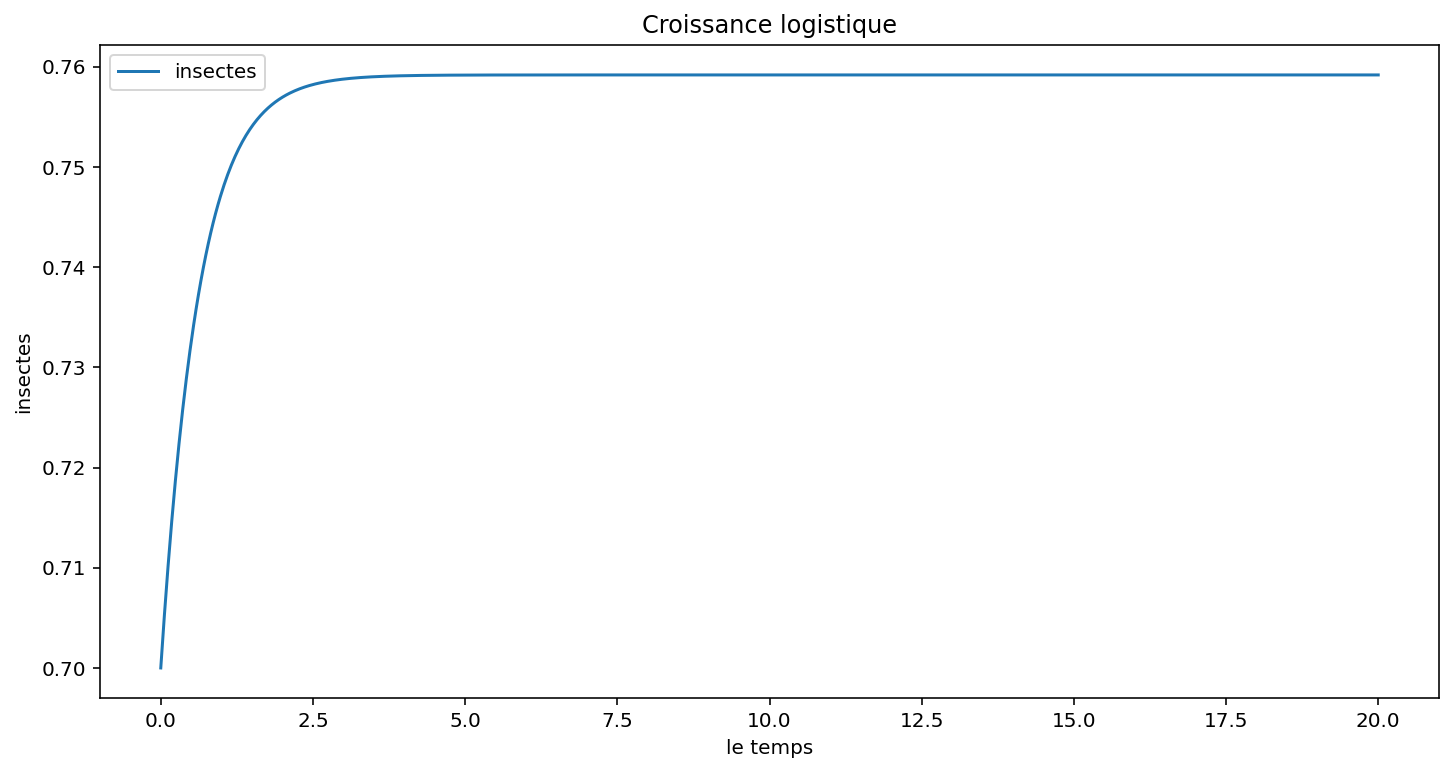

In [155]:
# Créer l'instance ici :
E1 = eulerE(x0,T,dt,pb1)
# Mettez ici l'appel du plot :
E1.plot()

**Question 5**
> On veut maintenant tester notre méthode d'Euler pour le problème 2.
> 1. Créez une instance de la classe `LV` que vous appelerez `pb2`. Vous prendrez $a=b=c=d=1$.
> 2. Créez une instance de la classe `eulerE` pour les paramètres `x0=0.5, T=20, dt=0.02, pb2`,
> 3. Puis vous appelez la méthode `plot` de cette instance.

*Indication : vous devez obtenir la figure suivante*

![Plot à obtenir](eulerE_pb2.png)


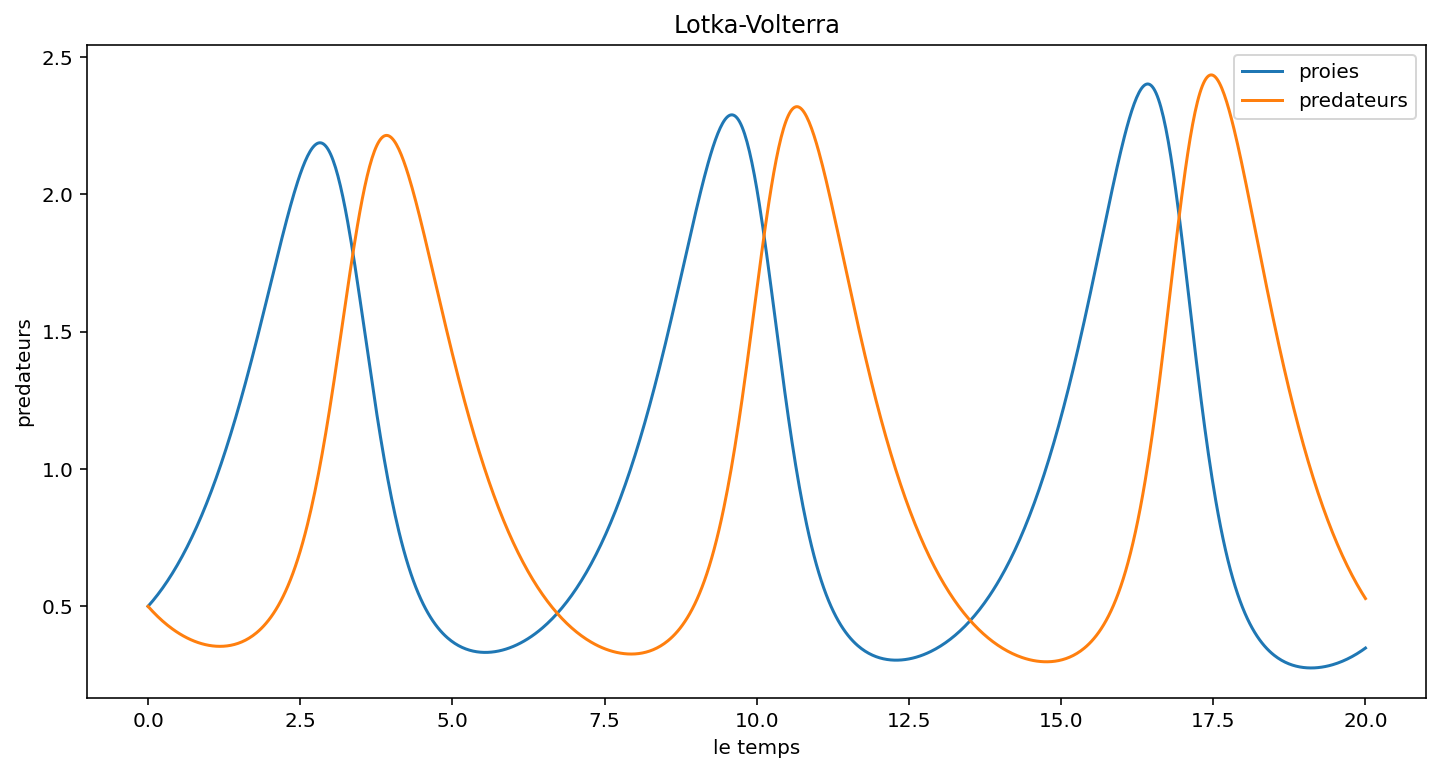

In [164]:
pb2 = LV(a=1.,b=1.,c=1.,d=1.)
x0=0.5 
T=20 
dt=0.02
E2 = eulerE(x0, T, dt, pb2)
E2.plot()

-------------
## Autres méthodes d'ordre plus élevé

Une autre façon d'augmenter la précision est d'utiliser une méthode plus précise. C'est le cas de la méthode de Heun définit par :

$$
 \left\{
    \begin{aligned}
        &x_{0}=y_{0},  \\
        &w_{n+1}=x_{n}+0.5h f(t_{n},x_{n}), &&n\geq 0. \\
        &x_{n+1}=x_{n}+h f(t_{n}+0.5h,w_{n}), &&n\geq 0.
    \end{aligned}
\right.
\qquad\qquad\qquad (2)
$$

**Question 6**
> Modifiez la classe `heun` qui hérite de la classe `eulerE` en redéfinissant uniquement la méthode `_F` de la façon suivante
> + `_F` prend en argument `self, t, X, dt` avec  `t, dt` deux décimaux et `X` un tableau de dimension 1 à `_dim` éléments,
> + la méthode calcule d'abord $w=x+0.5*dt f(t,x)$,
> + enfin elle renvoie $f(t+0.5*dt, w)$.


In [188]:
# Modifiez ici la classe Heun
class heun(eulerE):
    def _F(self, t, X, dt):
        """retourne le second membre"""
        w = X + 0.5 * dt*self._prob.rhs(T,X)
        return self._prob.rhs(T + 0.5*dt , w)

**Question 7**
> Testez votre classe `heun` pour le problème 2 :
> 1. Réutilisez l'instance de la classe `LV ` créé à la question 5.
> 2. Créez une instance de la classe `heun` pour les paramètres `x0, T, dt, pb2`,
> 3. Puis vous appelez la méthode `plot` de cette instance.

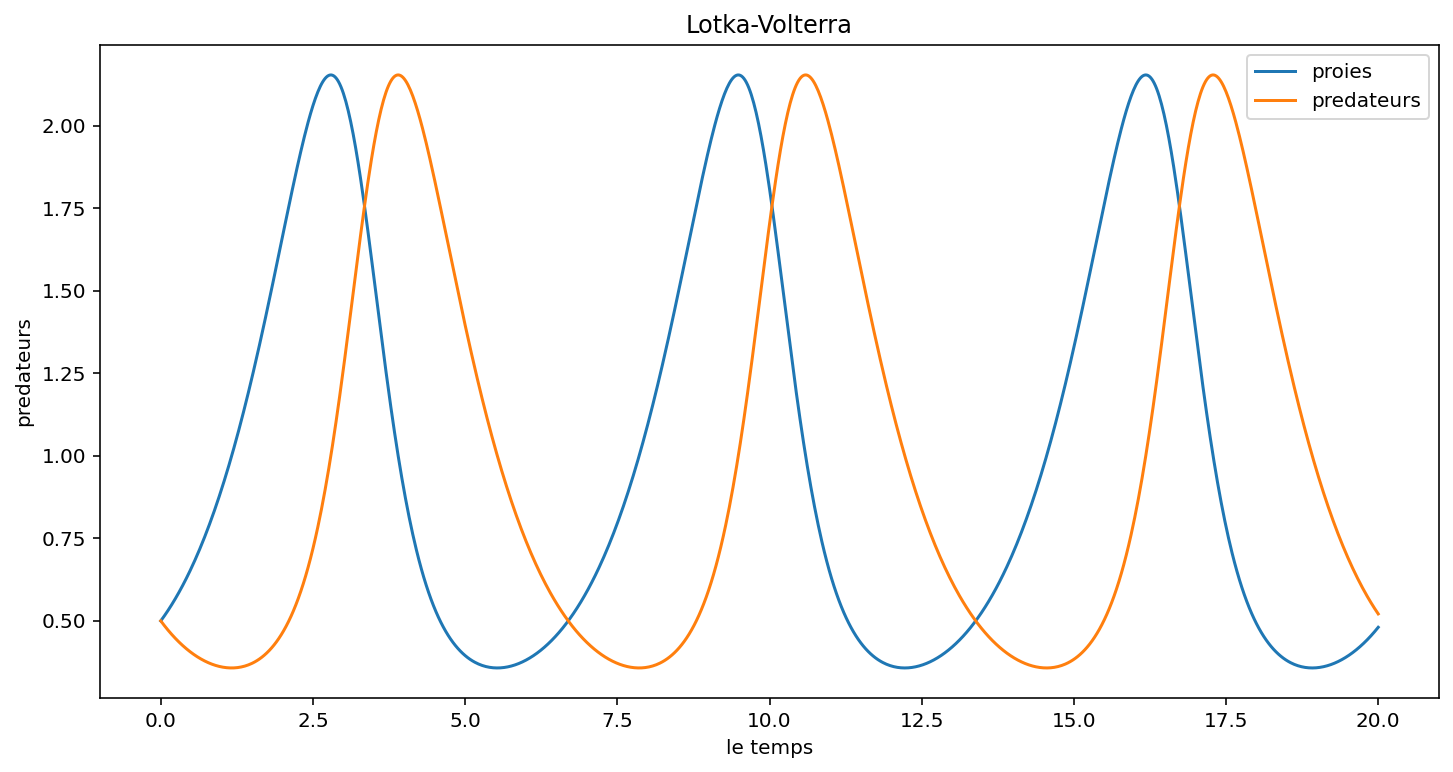

In [189]:
h = heun(x0, T, dt, pb2)
h.plot()

-----------
## Pas de temps adaptatif

Sur la figure ci-dessus on voit des oscillations de plus en plus grandes. Cela est dû aux erreurs que commet la méthode d'Euler. Une façon d'augmenter la précision des calculs consiste à adapter le pas de temps lorsque la solution varie vite. Nous allons ici proposer une façon simple de le faire.

**Question 8**
> **Complétez** le code ci-dessous de la façon suivante :
> 1. Complétez le code de la méthode `sub_time_step` de la façon suivante :
>    1. pour i allant de 0 (inclus) à k (exclus)
>       + ajoutez `sub_dt*self._F(t, x, sub_dt)` à `x` (remarque : `self._F` est la méthode définie dans la classe mère `eulerE` qu'il ne faut pas redéfinir ici),
>       + ajoutez `sub_dt` à `t`,
>    2. retournez la valeur finale de `x` à la fin de la boucle
> 2. Complétez le code de la méthode  `adapt_time_step` pour :
>     1. calculer `xbis` comme la valeur renvoyée par la méthode `sub_time_step(ind, 2*k)`,
>     2. si `k > self._sub_max` renvoie `xbis`,
>     3. si `np.max(x-xbis) < self._seuil` renvoie `xbis` et sinon renvoie `adapt_time_step(ind, k+1, xbis)`.
> 3. Ajouter la documentation (docstring) dans les fonctions que vous venez de compléter.

In [ ]:
# Code à compléter

class euler_adapt(eulerE):
    """
    Une classe pour définir la méthode d'Euler à pas adaptatif.
    
    Parameters
    ----------
    
    X0: array of float
        état initial
    T: float 
        temps final
    dt: float
        pas de temps de référence
    problem: class
        classe définissant le problème (en particulier sa dimension et son rhs)
    sub_max:
        sous-cyclage maximal pour la diminution du pas de temps
        
    Examples
    --------
    
    >>> Pb1 = CL(2,3)   # créer le problème 1 pour r=2, q=3.
    >>> X0 = 0.6
    >>> T, dt = 20, 1000
    >>> solEA = euler_adapt(X0, T, dt, Pb1)
    >>> solEA.plot()   # affiche la solution approchée en fonction du temps.
    
    """
    
    def __init__(self, X0, T, dt, problem, sub_max=None):
        super().__init__(X0, T, dt, problem)
        if sub_max == None :
            self._sub_max = 8
        else :
            self._sub_max = sub_max
        self._seuil = 1e-6
            
    def sub_time_step(self, ind, k):
        x = self._X[ind].copy()
        sub_dt = self._dt / k
        t = self._tlist[ind]
        # COMPLETER ICI SUB_TIME_STEP
    
    def adapt_time_step(self, ind, k, x=None):
        if np.any(x==None):
            x = self.sub_time_step(ind, k)
        # COMPLETER ICI ADAPT_TIME_STEP
        
    def solve(self):
        """Résoud l'edo à l'aide de l'approximation proposée par adapt_time_step."""
        for ind in range(self._N):
            self._X[ind+1] = self.adapt_time_step(ind, 1)

**Question 9**
> On veut maintenant tester notre classe `euler_adapt` pour le problème 2.
> 1. Réutilisez l'instance de la classe `LV ` créé à la question 5.
> 2. Créez une instance de la classe `euler_adapt` pour les paramètres `x0,T,dt,pb1`,
> 3. Puis vous appelez la méthode ̀`plot` de cette instance.

*Indication : vous devez obtenir la figure suivante*

![graphe pour euler_adapt](euler_adapt_pb2.png)


**Bonus**
> Exécutez le code suivant. Vous venez de définir un schéma de Heun à pas adaptatif sans rien faire !

In [ ]:
class Heun_adapt(euler_adapt, heun):
    """
    Une classe pour définir la méthode de Heun à pas adaptatif.
    
    Parameters
    ----------
    
    X0: array of float
        état initial
    T: float 
        temps final
    dt: float
        pas de temps de référence
    problem: class
        classe définissant le problème (en particulier sa dimension et son rhs)
    sub_max:
        sous-cyclage maximal pour la diminution du pas de temps
        
    Examples
    --------
    
    >>> Pb1 = CL(2, 3)   # créer le problème 1 pour r=2, q=3.
    >>> X0 = 0.6
    >>> T, dt = 20, 1000
    >>> solHA = euler_adapt(X0, T, dt, Pb1)
    >>> solHA.plot()   # affiche la solution approchée en fonction du temps.
    
    """
    def __init__(self, X0, T, dt, problem, sub_max=None):
        super().__init__(X0, T, dt, problem, sub_max)

In [ ]:
pb2 = LV(1, 1, 1, 1)
solHA = Heun_adapt(x0, T, dt, pb2, sub_max=16)
solHA.plot()